# Fine Tune Deep Learning Model

In diesem Notebook wird ein Deep Learning Model auf die Quelldaten angewendet.

## Table of Contents

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Visulization
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-07-02 15:00:16.767626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Save results for comparison

# Load the df
df_deep = pd.read_csv('results_deep.csv')

# Load the df
df_tra = pd.read_csv('results_tra.csv')

In [13]:
df_tra

,traditional,traditional_transfer,traditional_transfer_2000000
0,0.002329,0.000668,0.000668
1,0.026727,0.008381,0.008381
2,0.025035,0.003793,0.003793
3,0.611799,0.198643,0.198643
4,0.001498,0.000260,0.000260
...,...,...,...
1203,0.000456,0.001059,0.001059
1204,0.000313,0.001797,0.001797
1205,0.002092,0.000794,0.000794
1206,0.002513,0.004452,0.004452


## Prediction comparision

### Traditional Methods

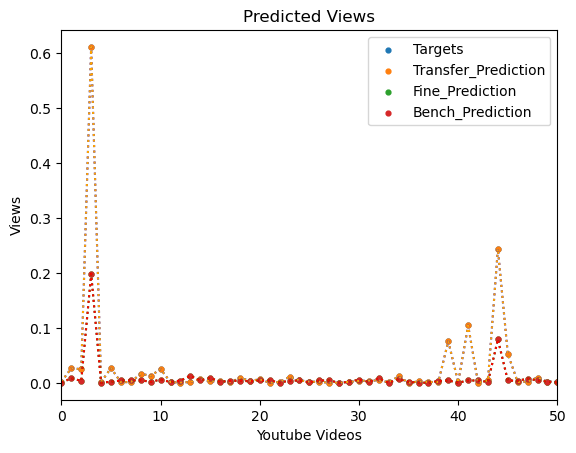

In [16]:
# Daten für den Scatter-Plot
data_tra = [
    (df_tra["traditional"], 'Targets', 'blue'),
    (df_tra["traditional"], 'Transfer_Prediction', 'orange'),
    (df_tra["traditional_transfer_2000000"], 'Fine_Prediction', 'green'),
    (df_tra["traditional_transfer_2000000"], 'Bench_Prediction', 'red')
]

# Schleife über die Daten
for i, (values, label, color) in enumerate(data_tra):
    plt.scatter(range(len(values)), values, label=label, s=12)
    plt.plot(range(len(values)), values, linestyle=':', color=color)

# Achsenbeschriftung und Titel
plt.xlabel('Youtube Videos')
plt.ylabel('Views')
plt.title('Predicted Views')
plt.xlim((0, 50))

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()

### Deep Methods

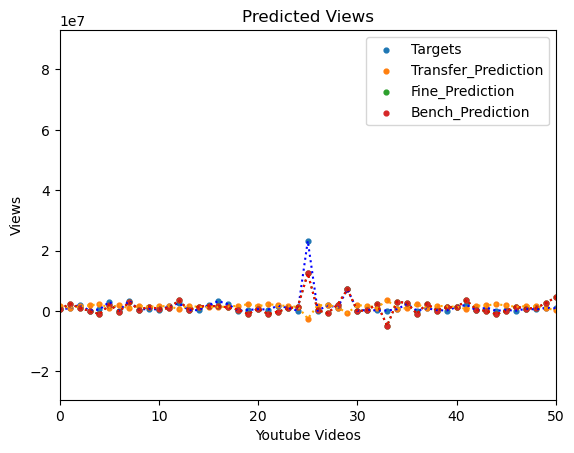

In [17]:
# Daten für den Scatter-Plot
data_deep = [
    (df_deep["targets"], 'Targets', 'blue'),
    (df_deep["deep_trasfer"], 'Transfer_Prediction', 'orange'),
    (df_deep["deep_fine"], 'Fine_Prediction', 'green'),
    (df_deep["deep_base"], 'Bench_Prediction', 'red')
]

# Schleife über die Daten
for i, (values, label, color) in enumerate(data_deep):
    plt.scatter(range(len(values)), values, label=label, s=12)
    plt.plot(range(len(values)), values, linestyle=':', color=color)

# Achsenbeschriftung und Titel
plt.xlabel('Youtube Videos')
plt.ylabel('Views')
plt.title('Predicted Views')
plt.xlim((0, 50))

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()

### Compare of best Traditional and Deep Method

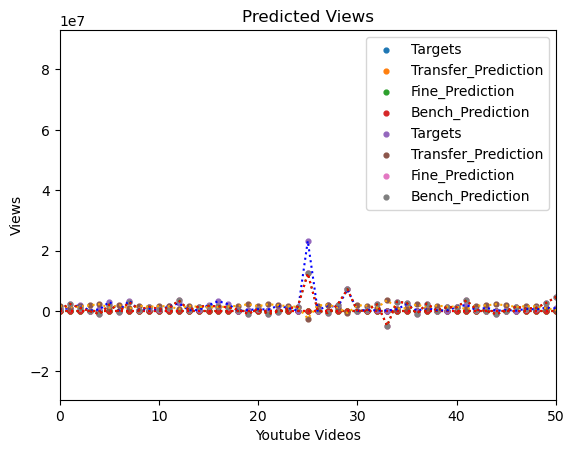

In [19]:
# Daten für den Scatter-Plot
data = [
    (df_tra["traditional"], 'Targets', 'blue'),
    (df_tra["traditional"], 'Transfer_Prediction', 'orange'),
    (df_tra["traditional_transfer_2000000"], 'Fine_Prediction', 'green'),
    (df_tra["traditional_transfer_2000000"], 'Bench_Prediction', 'red'),
    (df_deep["deep_trasfer"], 'Transfer_Prediction', 'orange'),
    (df_deep["deep_fine"], 'Fine_Prediction', 'green'),
    (df_deep["deep_base"], 'Bench_Prediction', 'red')
]

# Schleife über die Daten
for i, (values, label, color) in enumerate(data):
    plt.scatter(range(len(values)), values, label=label, s=12)
    plt.plot(range(len(values)), values, linestyle=':', color=color)

# Achsenbeschriftung und Titel
plt.xlabel('Youtube Videos')
plt.ylabel('Views')
plt.title('Predicted Views')
plt.xlim((0, 50))

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()